# on commence par importer les bibliothéques utiles sur notres projets 


In [83]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from download import download
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

# Importation des données 

In [84]:
url = " https://docs.google.com/spreadsheets/d/e/2PACX-1vQVtdpXMHB4g9h75a0jw8CsrqSuQmP5eMIB2adpKR5hkRggwMwzFy5kB-AIThodhVHNLxlZYm8fuoWj/pub?gid=2105854808&single=true&output=csv"
path_target = "./Bike_Totems_Montpellier.csv"
download(url, path_target, replace=False)  # if needed `pip install download`

# %%
# df: data frame
#%%
data_dfraw = pd.read_csv("Bike_Totems_Montpellier.csv")



Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [85]:
data_dfraw=data_dfraw.rename(columns = {'Heure / Time': 'HT'})

# Tableau obtenu aprés avoir  supprimer les deux derniers colonnes

In [86]:
data_dfraw1=data_dfraw[(data_dfraw.HT > '00:00') & (data_dfraw.HT< '09:01')].tail(30)

In [87]:
data_df= data_dfraw1.drop(['Remarque','Unnamed: 4'], inplace=False, axis=1)

# on met la date et lheur sur une seule colone 


In [88]:
data_df = data_df.dropna()

In [89]:
standard_time  = pd.to_datetime(data_df['Date'] +
                               ' ' + data_df['HT'],
                               format='%d/%m/%Y %H:%M:%S')

# Where d = day, m=month, Y=year, H=hour, M=minutes
standard_time 


1237   2021-01-26 08:30:00
1246   2021-01-28 08:08:00
1247   2021-01-28 08:32:00
1249   2021-01-29 07:35:00
1269   2021-02-04 08:29:00
1272   2021-02-05 08:29:00
1282   2021-02-08 08:30:00
1292   2021-02-12 08:28:00
1308   2021-02-16 08:16:00
1315   2021-02-19 07:57:00
1316   2021-02-19 08:50:00
1317   2021-02-19 09:00:00
1334   2021-02-27 06:23:00
1354   2021-03-04 08:25:00
1383   2021-03-10 06:59:00
1392   2021-03-12 08:27:00
1428   2021-03-19 08:26:00
1435   2021-03-23 08:29:00
1438   2021-03-24 06:29:00
1439   2021-03-24 07:19:00
1440   2021-03-24 07:40:00
1441   2021-03-24 07:50:00
1442   2021-03-24 08:00:00
1449   2021-03-25 08:28:00
1450   2021-03-25 08:50:00
1460   2021-03-26 08:28:00
1468   2021-03-27 08:29:00
1476   2021-03-28 07:50:00
1477   2021-03-28 08:21:00
1492   2021-03-30 08:35:00
dtype: datetime64[ns]

In [90]:
data_df['DateTime'] = standard_time

In [91]:
del data_df['Date']
del data_df['HT']

In [92]:
data_ts = data_df.set_index(['DateTime'])

In [93]:
data_ts.columns = ['V1J','VCJ']
data_ts.describe()


,V1J,VCJ
count,30.000000,30.000000
mean,72362.100000,131.533333
std,28818.794931,84.231100
min,25493.000000,14.000000
25%,48358.250000,54.500000
50%,78653.500000,145.500000
75%,97564.000000,185.250000
max,107125.000000,318.000000


In [94]:
del data_ts['V1J']

# # LA moyenne et l'ecart type des données

In [95]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    #rolstd = pd.rolling_std(timeseries, window=12)#Plot rolling statistics:
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

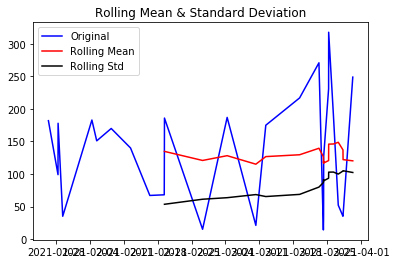

Results of Dickey-Fuller Test:
Test Statistic                 -5.292229
p-value                         0.000006
#Lags Used                      2.000000
Number of Observations Used    27.000000
Critical Value (5%)            -2.976430
Critical Value (1%)            -3.699608
Critical Value (10%)           -2.627601
dtype: float64


In [96]:
test_stationarity(data_ts['VCJ'])

# Préduction ARIMA

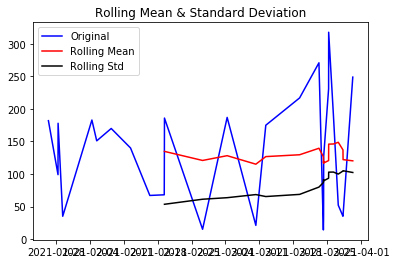

Results of Dickey-Fuller Test:
Test Statistic                 -5.292229
p-value                         0.000006
#Lags Used                      2.000000
Number of Observations Used    27.000000
Critical Value (5%)            -2.976430
Critical Value (1%)            -3.699608
Critical Value (10%)           -2.627601
dtype: float64
/opt/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


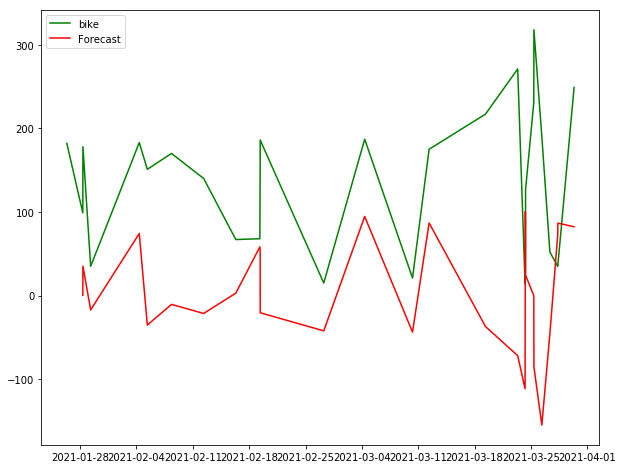

In [82]:
test_stationarity(data_ts['VCJ'])

# %%
from statsmodels.tsa.arima_model import ARIMA
#%%
fig = plt.figure(figsize=(10,8))
model = ARIMA(data_ts['VCJ'], order=(0,1,2)) 
ax = plt.gca()
results = model.fit()
plt.plot(data_ts['VCJ'], color='green')
plt.plot(results.fittedvalues, color='red')
ax.legend(['bike', 'Forecast'])
#%%

print(results)